# Fig: PSTH + STA

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
pal_model, pal_cat = get_palette()
skip_fits = [
    'fixate2_nf-420_beta-0.15_(2023_04_27,13:57)',
    'fixate1_nf-420_beta-0.8_(2023_05_07,04:15)',
]
kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

def _info(fit):
    info = fit.split('_')
    i = info.index([
        e for e in info
        if 'nf-' in e
    ].pop())
    category = info[i - 1]
    nf = int(info[i].split('-')[1])
    beta = info[i + 1].split('-')[1]
    try:
        beta = float(beta)
    except ValueError:
        beta = str(beta)
    tag = 'VAE' if 'vanilla' in info else 'cNVAE'
    if beta == 'ae':
        tag = tag.replace('V', '')
    return category, nf, beta, tag

fig_dir = pjoin(fig_base_dir, 'STA')
os.makedirs(fig_dir, exist_ok=True)

print(fig_dir)

/home/hadi/Dropbox/git/jb-MTMST/figs/STA

In [3]:
path = pjoin(tmp_dir, 'neural_analysis')
print(sorted(os.listdir(path)))

[
    'fixate0_nf-280_beta-0.1_(2023_05_11,19:22).npy',
    'fixate0_nf-280_beta-0.5_(2023_05_11,20:35).npy',
    'fixate0_nf-280_beta-0.8_(2023_05_14,21:07).npy',
    'fixate0_nf-280_beta-1.0_(2023_05_08,15:10).npy',
    'fixate0_nf-280_beta-10.0_(2023_05_07,04:49).npy',
    'fixate0_nf-280_beta-2.0_(2023_05_07,04:16).npy',
    'fixate0_nf-280_beta-5.0_(2023_05_07,09:58).npy',
    'fixate1_nf-420_beta-0.01_(2023_04_30,07:42).npy',
    'fixate1_nf-420_beta-0.15_(2023_04_27,20:20).npy',
    'fixate1_nf-420_beta-0.1_(2023_04_29,22:01).npy',
    'fixate1_nf-420_beta-0.2_(2023_04_30,21:37).npy',
    'fixate1_nf-420_beta-0.3_(2023_05_07,01:03).npy',
    'fixate1_nf-420_beta-0.4_(2023_05_07,02:37).npy',
    'fixate1_nf-420_beta-0.5_(2023_04_30,20:05).npy',
    'fixate1_nf-420_beta-0.6_(2023_04_30,20:36).npy',
    'fixate1_nf-420_beta-0.7_(2023_04_30,21:40).npy',
    'fixate1_nf-420_beta-0.8_(2023_05_07,04:15).npy',
    'fixate1_nf-420_beta-0.8_(2023_05_13,14:52).npy',
    'fixate1_nf-420_beta-0.9_(2023_05_07,05:51).npy',
    'fixate1_nf-420_beta-1.0_(2023_04_29,19:41).npy',
    'fixate1_nf-420_beta-1.5_(2023_05_08,14:55).npy',
    'fixate1_nf-420_beta-10.0_(2023_04_30,22:48).npy',
    'fixate1_nf-420_beta-2.0_(2023_05_07,07:27).npy',
    'fixate1_nf-420_beta-20.0_(2023_05_08,16:16).npy',
    'fixate1_nf-420_beta-5.0_(2023_05_07,08:59).npy',
    'fixate1_nf-420_beta-ae_(2023_05_12,07:31).npy',
    'fixate2_nf-420_beta-0.15_(2023_04_28,12:46).npy',
    'fixate2_nf-420_beta-0.5_(2023_05_03,08:39).npy',
    'fixate2_nf-420_beta-1.0_(2023_05_01,22:45).npy',
    'fixate2_nf-420_beta-5.0_(2023_05_15,08:46).npy',
    'obj1_nf-280_beta-0.15_(2023_04_26,15:53).npy',
    'obj1_nf-280_beta-0.1_(2023_05_14,08:28).npy',
    'obj1_nf-280_beta-0.5_(2023_05_04,11:11).npy',
    'obj1_nf-280_beta-0.8_(2023_05_14,22:09).npy',
    'obj1_nf-280_beta-1.0_(2023_05_04,10:27).npy',
    'obj1_nf-280_beta-10.0_(2023_05_12,21:30).npy',
    'obj1_nf-280_beta-2.0_(2023_05_13,20:52).npy',
    'obj1_nf-280_beta-5.0_(2023_05_15,07:20).npy',
    'transl1_nf-420_beta-0.01_(2023_05_04,09:38).npy',
    'transl1_nf-420_beta-0.15_(2023_04_27,13:00).npy',
    'transl1_nf-420_beta-0.3_(2023_05_04,11:11).npy',
    'transl1_nf-420_beta-0.5_(2023_05_02,15:00).npy',
    'transl1_nf-420_beta-0.8_(2023_05_04,12:46).npy',
    'transl1_nf-420_beta-1.0_(2023_05_02,22:02).npy',
    'transl1_nf-420_beta-10.0_(2023_05_04,09:20).npy',
    'transl2_nf-420_beta-0.15_(2023_04_27,19:16).npy',
    'transl2_nf-420_beta-0.5_(2023_05_03,10:12).npy',
    'transl2_nf-420_beta-1.0_(2023_05_02,00:19).npy',
    'vanilla_fixate1_nf-420_beta-0.01_(2023_05_13,21:48).npy',
    'vanilla_fixate1_nf-420_beta-0.15_(2023_05_02,15:15).npy',
    'vanilla_fixate1_nf-420_beta-0.1_(2023_05_10,21:14).npy',
    'vanilla_fixate1_nf-420_beta-0.2_(2023_05_10,23:41).npy',
    'vanilla_fixate1_nf-420_beta-0.3_(2023_05_13,07:46).npy',
    'vanilla_fixate1_nf-420_beta-0.4_(2023_05_11,19:25).npy',
    'vanilla_fixate1_nf-420_beta-0.5_(2023_05_07,02:51).npy',
    'vanilla_fixate1_nf-420_beta-0.6_(2023_05_12,18:12).npy',
    'vanilla_fixate1_nf-420_beta-0.7_(2023_05_12,08:53).npy',
    'vanilla_fixate1_nf-420_beta-0.8_(2023_05_11,02:19).npy',
    'vanilla_fixate1_nf-420_beta-0.9_(2023_05_13,20:45).npy',
    'vanilla_fixate1_nf-420_beta-1.0_(2023_05_07,01:18).npy',
    'vanilla_fixate1_nf-420_beta-1.5_(2023_05_14,14:16).npy',
    'vanilla_fixate1_nf-420_beta-10.0_(2023_05_09,09:59).npy',
    'vanilla_fixate1_nf-420_beta-2.0_(2023_05_09,08:19).npy',
    'vanilla_fixate1_nf-420_beta-5.0_(2023_05_15,07:23).npy',
    'vanilla_fixate1_nf-420_beta-ae_(2023_05_13,07:49).npy'
]

In [4]:
selected_fits = [
    'fixate1_nf-420_beta-0.01_(2023_04_30,07:42).npy',
    'fixate1_nf-420_beta-0.8_(2023_05_13,14:52).npy',
    'fixate1_nf-420_beta-5.0_(2023_05_07,08:59).npy',
    'vanilla_fixate1_nf-420_beta-5.0_(2023_05_15,07:23).npy',
    'vanilla_fixate1_nf-420_beta-0.01_(2023_05_13,21:48).npy',
]

In [5]:
for fit in tqdm(sorted(selected_fits)):
    if 'reservoir' in fit or fit in skip_fits:
        continue
    category, nf, beta, tag = _info(fit)    
    if beta == 20.0:
        continue

    results = np.load(
        pjoin(path, fit),
        allow_pickle=True,
    ).item()

    figs, sups = [], []
    for k, v in results['sta_model'].items():
        pred = results['pred_tst'][k]
        if pred is None:
            continue
        a = results['alignment_score'][k]
        r2 = sk_metric.r2_score(
            y_true=results['data'][k]['y_tst'],
            y_pred=results['pred_tst'][k],
        ) * 100
        if r2 < 20:
            continue
        fig, _ = show_opticflow_full(v, display=False)
        sup = fig.suptitle(f"{k};    align = {a:0.2f},  r2 = {r2:0.1f} %", fontsize=13, y=0.97)
        figs.append(fig)
        sups.append(sup)

    save_fig(
        fname=f"{fit[:-4]}.pdf",
        save_dir=pjoin(fig_base_dir, 'STA'),
        fig=figs,
        sup=sups,
    )

100%|██████████| 5/5 [02:18<00:00, 27.79s/it]


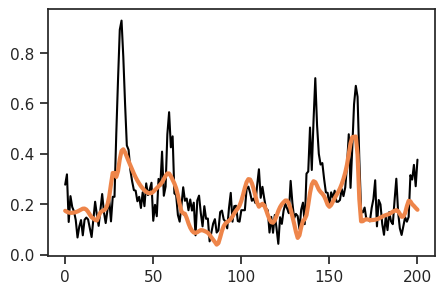

In [6]:
plt.plot(results['data'][k]['y_tst'], color='k')
plt.plot(results['pred_tst'][k], color=pal_model[tag], lw=3)
plt.show()

In [11]:
selected_fits = [
    'fixate1_nf-420_beta-0.01_(2023_04_30,07:42).npy',
    'vanilla_fixate1_nf-420_beta-5.0_(2023_05_15,07:23).npy',
]
results = {}
for fit in tqdm(sorted(selected_fits)):
    results[fit] = np.load(
        pjoin(path, fit),
        allow_pickle=True,
    ).item()

100%|██████████| 2/2 [00:09<00:00,  4.85s/it]


In [84]:
cell = 'YUWEI_clu267_4'

In [187]:
zorders = {'cNVAE': 2, 'VAE': 1}
stas_model, stas_spk = {}, {}
r2s, preds, importances = {}, {}, {}
a_scores = {}
for k, v in results.items():
    category, nf, beta, tag = _info(k)
    r2 = sk_metric.r2_score(
        y_true=v['data'][cell]['y_tst'],
        y_pred=v['pred_tst'][cell],
    ) * 100
    r2s[tag] = r2
    preds[tag] = v['pred_tst'][cell]
    importances[tag] = v['perm_mu'][cell]
    stas_spk[tag] = v['sta_spks'][cell]
    stas_model[tag] = v['sta_model'][cell]
    a_scores[tag] = v['alignment_score'][cell]

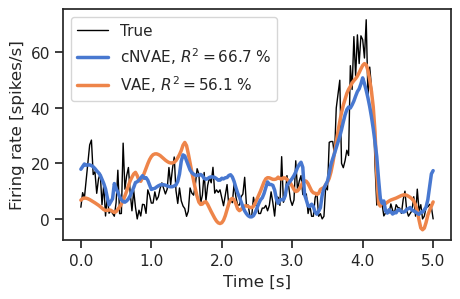

In [228]:
fig, ax = create_figure(1, 1, (5, 3))
true = v['data'][cell]['y_tst'] / 25e-3
ax.plot(true, color='k', lw=1, label='True', zorder=0)
for tag, y in preds.items():
    label = f"{tag}, " + r"$R^2 = $" + f"{r2s[tag]:0.1f} %"
    ax.plot(y / 25e-3, color=pal_model[tag], lw=2.5, label=label, zorder=zorders[tag])
xticks = [i for i in range(201) if i % 40 == 0]
ax.set(xticks=xticks, xticklabels=[i * 25e-3 for i in xticks])
ax.set_ylabel('Firing rate [spikes/s]')
ax.set_xlabel('Time [s]')
ax.legend()
plt.show()

In [229]:
fig.savefig(pjoin(fig_base_dir, 'psth.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'psth.png'), **kws_fig)

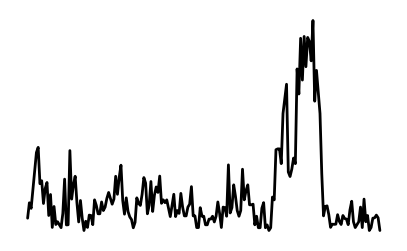

In [236]:
fig, ax = create_figure(1, 1, (5, 3))
true = v['data'][cell]['y_tst'] / 25e-3
ax.plot(true, color='k', lw=2)
remove_ticks(ax, True)

In [237]:
fig.savefig(pjoin(fig_base_dir, 'true.pdf'), **kws_fig)

In [238]:
cell

'YUWEI_clu267_4'

In [239]:
span = range(-8, 8 + 1)
ticks, ticklabels = make_ticks(span, 4)

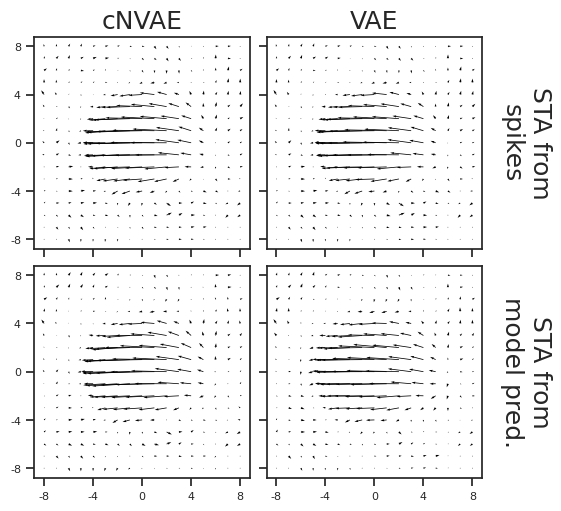

In [248]:
fig, axes = create_figure(2, 2, (5.5, 5), 'all', 'all', 'constrained')
axes[0, 0].quiver(
    span, span, stas_spk['cNVAE'][0], stas_spk['cNVAE'][1],
    scale=None,
)
axes[1, 0].quiver(
    span, span, stas_model['cNVAE'][0], stas_model['cNVAE'][1],
    scale=None,
)
axes[0, 1].quiver(
    span, span, stas_spk['VAE'][0], stas_spk['VAE'][1],
    scale=None,
)
axes[1, 1].quiver(
    span, span, stas_model['VAE'][0], stas_model['VAE'][1],
    scale=None,
)
axes[0, 0].set_title('cNVAE', fontsize=18)
axes[0, 1].set_title('VAE', fontsize=18)

ax_twix = axes[0, 1].twinx()
ax_twix.set_ylabel('STA from\nspikes', rotation=-90, fontsize=18, labelpad=50)
remove_ticks(ax_twix)

ax_twix = axes[1, 1].twinx()
ax_twix.set_ylabel('STA from\nmodel pred.\n', rotation=-90, fontsize=18, labelpad=50)
remove_ticks(ax_twix)
    


for ax in axes.flat:
    ax.set(
        xticks=ticks,
        yticks=ticks,
        xticklabels=ticklabels,
        yticklabels=ticklabels,
    )
    ax.tick_params(labelsize=8)


In [249]:
fig.savefig(pjoin(fig_base_dir, 'sta.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'sta.png'), **kws_fig)

In [188]:
a_scores

{'cNVAE': 0.872481504660178, 'VAE': 0.2005288020451752}

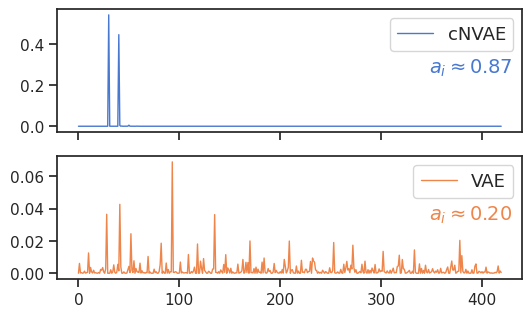

In [218]:
fig, axes = create_figure(2, 1, (6, 3.5), 'all')
for i, (tag, x) in enumerate(importances.items()):
    axes[i].plot(x / sum(x), label=tag, lw=1.0, color=pal_model[tag])
    axes[i].legend(loc='upper right', fontsize=13)
    axes[i].annotate(
        text=r"$a_i \approx $" + f"{a_scores[tag]:0.2f}",
        xy=(0.8, 0.48),
        xycoords='axes fraction',
        color=pal_model[tag],
        fontsize=14,
    )
# axes[-1].set_xlabel('Latent dimensions')
plt.show()

In [219]:
fig.savefig(pjoin(fig_base_dir, 'sparse.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'sparse.png'), **kws_fig)

In [181]:
for k, v in results.items():
    v

0.2005288020451752

In [185]:
list()

['YUWEI_clu036_0',
 'YUWEI_clu037_0',
 'YUWEI_clu038_0',
 'YUWEI_clu039_0',
 'YUWEI_clu040_0',
 'YUWEI_clu043_0',
 'YUWEI_clu044_0',
 'YUWEI_clu053_0',
 'YUWEI_clu055_0',
 'YUWEI_clu059_0',
 'YUWEI_clu061_0',
 'YUWEI_clu064_0',
 'YUWEI_clu068_0',
 'YUWEI_clu069_0',
 'YUWEI_clu081_0',
 'YUWEI_clu082_0',
 'YUWEI_clu087_0',
 'YUWEI_clu088_0',
 'YUWEI_clu089_0',
 'YUWEI_clu090_0',
 'YUWEI_clu095_0',
 'YUWEI_clu096_0',
 'YUWEI_clu099_0',
 'YUWEI_clu104_0',
 'YUWEI_clu107_0',
 'YUWEI_clu108_0',
 'YUWEI_clu109_0',
 'YUWEI_clu110_0',
 'YUWEI_clu116_0',
 'YUWEI_clu120_0',
 'YUWEI_clu126_0',
 'YUWEI_clu131_0',
 'YUWEI_clu132_0',
 'YUWEI_clu142_0',
 'YUWEI_clu145_0',
 'YUWEI_clu146_0',
 'YUWEI_clu147_0',
 'YUWEI_clu148_0',
 'YUWEI_clu180_0',
 'YUWEI_clu181_0',
 'YUWEI_clu183_0',
 'YUWEI_clu209_0',
 'YUWEI_clu209_1',
 'YUWEI_clu209_4',
 'YUWEI_clu209_12',
 'YUWEI_clu209_13',
 'YUWEI_clu209_14',
 'YUWEI_clu209_15',
 'YUWEI_clu216_0',
 'YUWEI_clu221_1',
 'YUWEI_clu221_2',
 'YUWEI_clu221_3',
 'YUWEI_

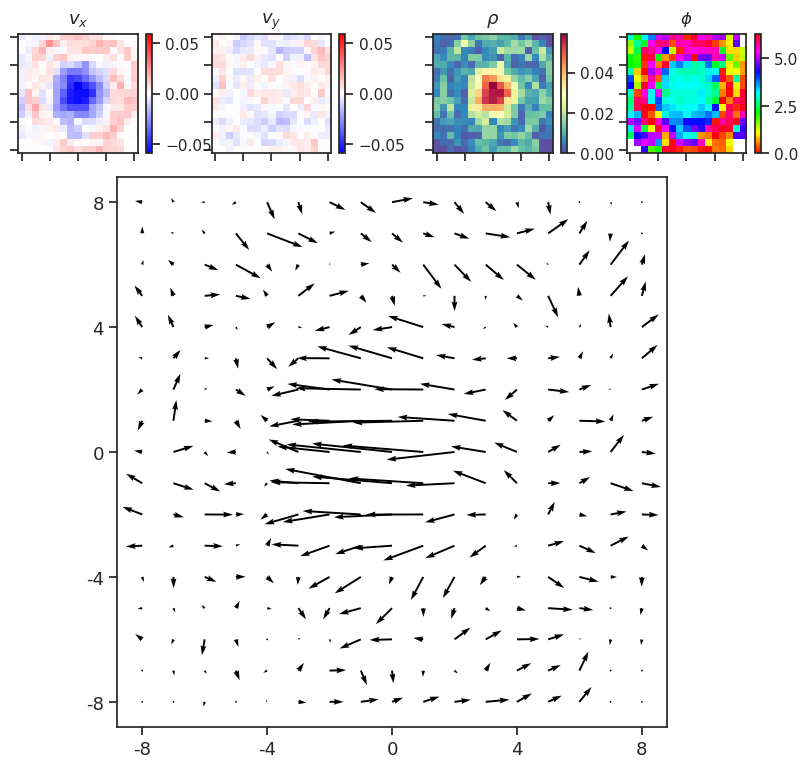

In [119]:
show_opticflow_full(stas_spk['cNVAE'] - stas_model['cNVAE']);

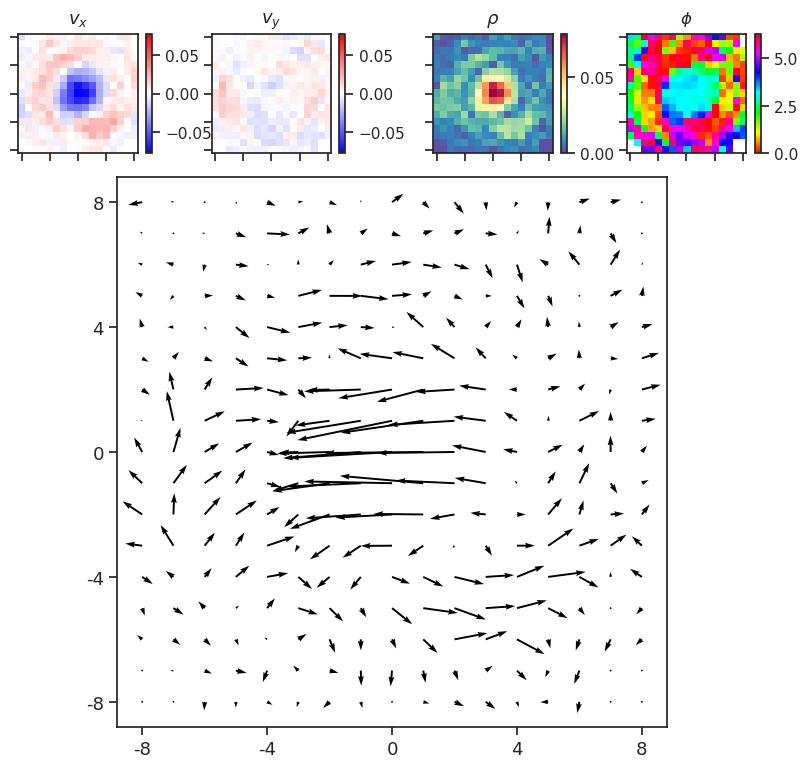

In [120]:
show_opticflow_full(stas_spk['VAE'] - stas_model['VAE']);

## Create df

In [4]:
df_align = collections.defaultdict(list)
for fit in tqdm(sorted(os.listdir(path))):
    if 'reservoir' in fit or fit in skip_fits:
        continue
    category, nf, beta, tag = _info(fit)    
    if beta == 20.0:
        continue

    # load npy
    results = np.load(
        pjoin(path, fit),
        allow_pickle=True,
    ).item()
    
    # get alignment scores
    for k, a in results['alignment_score'].items():
        _, expt, cell = k.split('_')
        df_align['model'].append(tag)
        df_align['category'].append(category)
        df_align['beta'].append(beta)
        df_align['nf'].append(nf)
        df_align['expt'].append(expt)
        df_align['cell'].append(int(cell))
        df_align['a'].append(a)

df_align = pd.DataFrame(df_align)
betas = ['ae'] + sorted([
    b for b in df_align['beta'].unique()
    if isinstance(b, float)
])

100%|███████████████████████████████████████████| 65/65 [13:47<00:00, 12.73s/it]


In [5]:
df_align

,model,category,beta,nf,expt,cell,a
0,cNVAE,fixate0,0.1,280,clu036,0,0.363952
1,cNVAE,fixate0,0.1,280,clu037,0,0.411051
2,cNVAE,fixate0,0.1,280,clu038,0,0.432012
3,cNVAE,fixate0,0.1,280,clu039,0,0.397605
4,cNVAE,fixate0,0.1,280,clu040,0,0.516862
...,...,...,...,...,...,...,...
8927,AE,fixate1,ae,420,ytu029,19,0.464388
8928,AE,fixate1,ae,420,ytu029,20,0.288113
8929,AE,fixate1,ae,420,ytu029,21,0.264531
8930,AE,fixate1,ae,420,ytu029,22,0.302297


In [8]:
df_align['category'].unique()

array(['fixate0', 'fixate1', 'fixate2', 'obj1', 'transl1', 'transl2'],
      dtype=object)

In [7]:
props_box = {
    'boxprops': {
        'edgecolor': 'k',
        # 'facecolor': 'none',
        # 'lw': 1.5,
        'ls': '-'},
    'medianprops': {'color': 'k', 'lw': 1.5},
    'whiskerprops': {'color': 'k', 'lw': 1.5},
    'capprops': {'color': 'k', 'lw': 1.5, 'zorder': 3},
    'flierprops': {
        'marker': 'o',
        'alpha': 0.3,
        'zorder': 1,
        'markersize': 2},
    'showfliers': True,
    'showmeans': True,
    'dodge': True,
    'width': 0.5,
}
props_mean = {
    'marker': 'o',
    'markerfacecolor': 'white',
    'markeredgecolor': 'k',
    'markersize': 3,
    'alpha': 1.0,
}

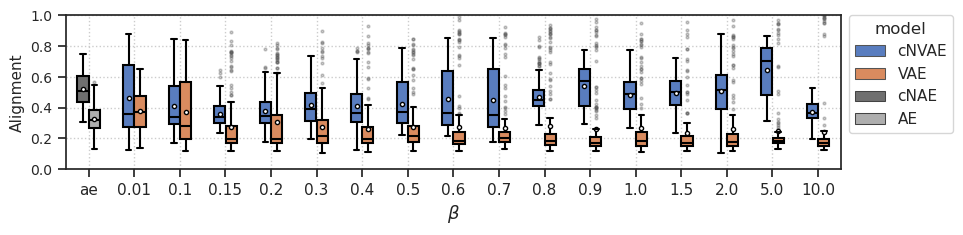

In [11]:
_df1 = df_align.loc[
    (df_align['category'] == 'fixate1') &
    (df_align['beta'] != 'ae')
]
_df2 = df_align.loc[
    (df_align['category'] == 'fixate1') &
    (df_align['beta'] == 'ae')
]
_pal1 = {
    k: v for k, v in pal_model.items()
    if k in _df1['model'].unique()
}
_pal2 = {
    k: v for k, v in pal_model.items()
    if k in _df2['model'].unique()
}

fig, ax = create_figure(1, 1, (10, 2))
sns.boxplot(
    data=_df1,
    x='beta',
    y='a',
    hue='model',
    palette=_pal1,
    hue_order=_pal1,
    meanprops=props_mean,
    order=betas,
    ax=ax,
    **props_box,
)
sns.boxplot(
    data=_df2,
    x='beta',
    y='a',
    hue='model',
    palette=_pal2,
    hue_order=_pal2,
    meanprops=props_mean,
    order=betas,
    ax=ax,
    **props_box,
)

ax.set_xlabel(r'$\beta$', fontsize=13)
ax.set_ylabel('Alignment', fontsize=11)

ax.tick_params(axis='y', labelsize=10)
ax.set_ylim(0, 1)

sns.move_legend(ax, None, bbox_to_anchor=(1.0, 1.05))
    
ax.grid()

In [12]:
fig.savefig(pjoin(fig_base_dir, 'neural_align.pdf'), **kws_fig)
fig.savefig(pjoin(fig_base_dir, 'neural_align.png'), **kws_fig)

In [9]:
_df1

,model,category,beta,nf,expt,cell,a
846,cNVAE,fixate1,0.01,420,clu036,0,0.268528
847,cNVAE,fixate1,0.01,420,clu037,0,0.527369
848,cNVAE,fixate1,0.01,420,clu038,0,0.190698
849,cNVAE,fixate1,0.01,420,clu039,0,0.246395
850,cNVAE,fixate1,0.01,420,clu040,0,0.586000
...,...,...,...,...,...,...,...
7940,VAE,fixate1,2.0,420,ytu029,19,0.138316
7941,VAE,fixate1,2.0,420,ytu029,20,0.147245
7942,VAE,fixate1,2.0,420,ytu029,21,0.241407
7943,VAE,fixate1,2.0,420,ytu029,22,0.158871


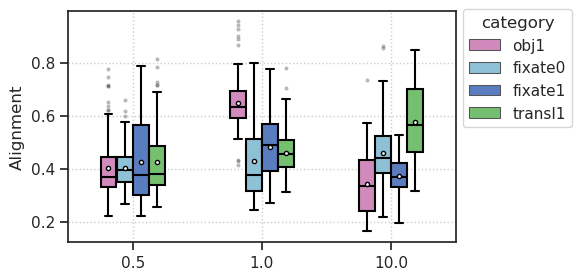

In [10]:
which_betas = [0.5, 1.0, 10.0]
_df1 = df_align.loc[
    (df_align['model'] == 'cNVAE') &
    (df_align['category'] != 'fixate2') &
    (df_align['beta'].isin(which_betas))
]
_pal1 = {
    k: v for k, v in pal_cat.items()
    if k in _df1['category'].unique()
}
fig, ax = create_figure(1, 1, (5, 3))
sns.boxplot(
    data=_df1,
    x='beta',
    y='a',
    hue='category',
    palette=_pal1,
    hue_order=_pal1,
    meanprops=props_mean,
    order=which_betas,
    ax=ax,
    **props_box,
)
ax.set_xlabel('')
ax.set_ylabel('Alignment')
sns.move_legend(ax, None, bbox_to_anchor=(1, 1.04))
# leg = ax.get_legend()
# if leg is not None:
#     leg.remove()
ax.grid()

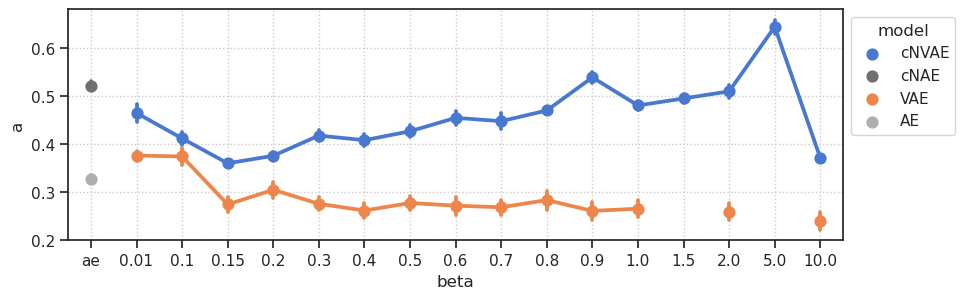

In [12]:
_df = df_align.loc[df_align['category'] == 'fixate1']

fig, ax = create_figure(1, 1, (10, 3))
sns.pointplot(
    data=_df,
    x='beta',
    y='a',
    hue='model',
    palette=pal_model,
    errorbar='se',
    order=betas,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.grid()

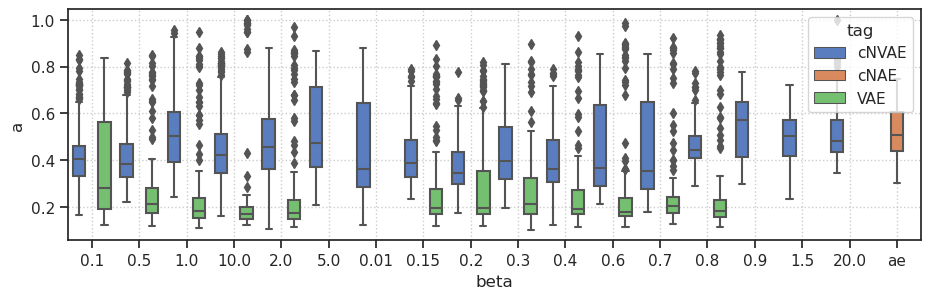

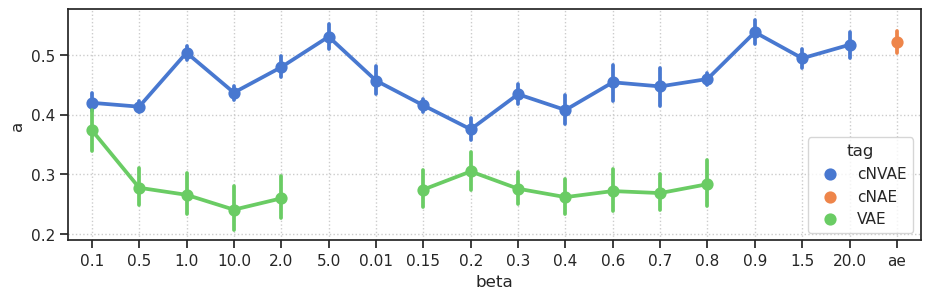

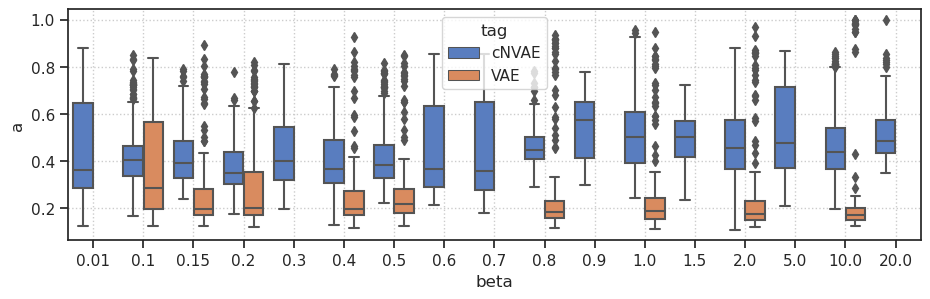

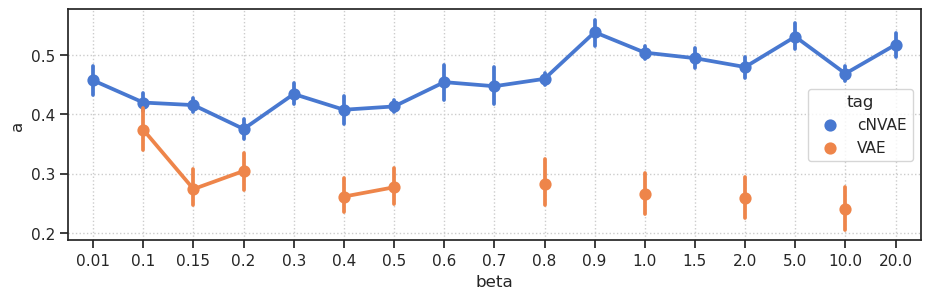

In [9]:
list(results)

['data',
 'pred',
 'pred_tst',
 'sta_model',
 'sta_spks',
 'perm_mu',
 'perm_sd',
 'alignment_score',
 'p_g_given_z',
 'p_z_given_neuron',
 'p_g_given_neuron',
 'labels']

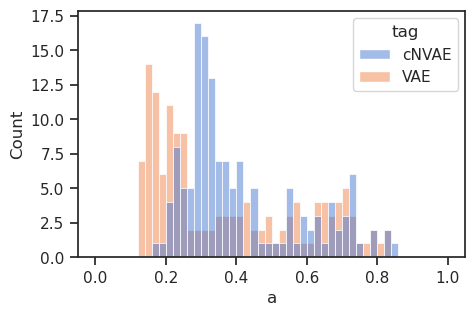

In [17]:
_df = df.loc[
    (df['beta'] == 0.1) &
    (df['category'] == 'fixate1')
]
sns.histplot(
    data=_df,
    x='a',
    hue='tag',
    palette='muted',
    bins=np.linspace(0, 1, 51),
);

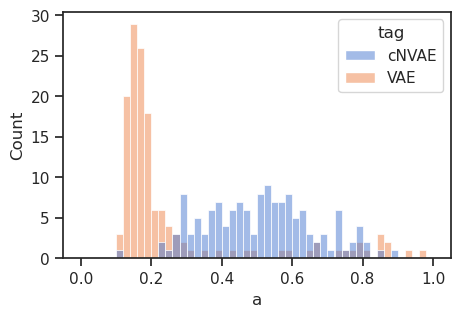

In [18]:
_df = df.loc[
    (df['beta'] == 2.0) &
    (df['category'] == 'fixate1')
]
sns.histplot(
    data=_df,
    x='a',
    hue='tag',
    palette='muted',
    bins=np.linspace(0, 1, 51),
);

In [19]:
_df = df.loc[
    (df['beta'] == 0.1) &
    (df['category'] == 'fixate1')
]
test = sp_stats.ttest_rel(
    a=_df.loc[_df['tag'] == 'cNVAE', 'a'].values,
    b=_df.loc[_df['tag'] == 'VAE', 'a'].values,
    alternative='greater',
)
test

Ttest_relResult(statistic=1.4821356706657018, pvalue=0.07027580646364412)

In [20]:
_df = df.loc[
    (df['beta'] == 0.2) &
    (df['category'] == 'fixate1')
]
test = sp_stats.ttest_rel(
    a=_df.loc[_df['tag'] == 'cNVAE', 'a'].values,
    b=_df.loc[_df['tag'] == 'VAE', 'a'].values,
    alternative='greater',
)
test

Ttest_relResult(statistic=3.9305124052070206, pvalue=6.636257636525163e-05)

In [11]:
fit = 'vanilla_fixate1_nf-420_beta-0.5_(2023_05_07,02:51).npy'
results_vanilla = np.load(
    pjoin(path, fit),
    allow_pickle=True,
).item()

fit = 'fixate1_nf-420_beta-0.5_(2023_04_30,20:05).npy'
results = np.load(
    pjoin(path, fit),
    allow_pickle=True,
).item()

In [12]:
test = sp_stats.ttest_rel(
    a=list(results['alignment_score'].values()),
    b=list(results_vanilla['alignment_score'].values()),
    alternative='greater',
)
test

Ttest_relResult(statistic=7.6824449701635835, pvalue=1.230946161966216e-12)

In [38]:
def statistic(a, b):
    return np.mean(a - b)


test = sp_stats.permutation_test(
    data=(
        list(results['alignment_score'].values()),
        list(results_vanilla['alignment_score'].values())),
    n_resamples=int(1e6),
    permutation_type='samples',
    alternative='two-sided',
    statistic=statistic,
    random_state=0,
)

In [40]:
test.statistic, test.pvalue

(0.14913383690169152, 1.999998000002e-06)

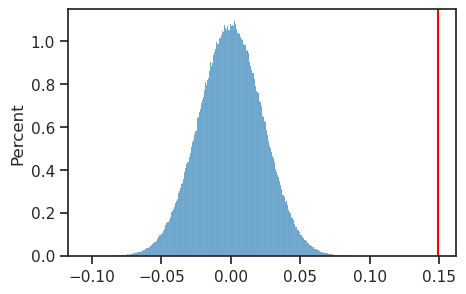

In [46]:
sns.histplot(test.null_distribution, stat='percent')
plt.axvline(test.statistic, color='r');